In [1]:
import pandas as pd
from ISLP import load_data
import numpy as np
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (summarize, poly)
from pygam import s as s_gam, LinearGAM
from ISLP.transforms import NaturalSpline
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
Auto = load_data('Auto')
Auto=Auto.reset_index()

In [3]:
label=LabelEncoder()
label_=label.fit_transform(Auto["name"])
Auto["name"]=label_

<Axes: xlabel='cylinders', ylabel='mpg'>

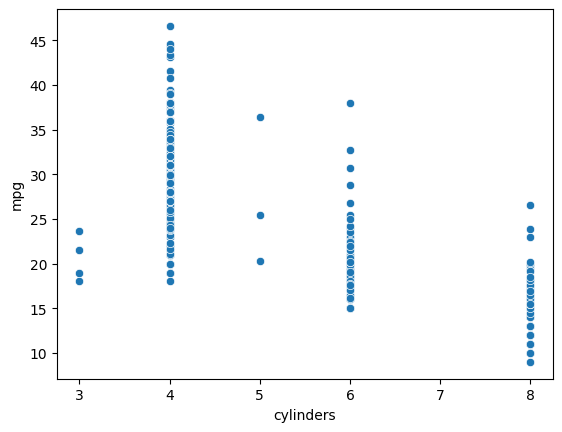

In [4]:
sns.scatterplot(x='cylinders', y='mpg', data=Auto)

In [5]:
X = Auto["cylinders"].values.reshape(-1, 1)
Y = Auto["mpg"].values

for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, Y)
    Y_pred = model.predict(X_poly)
    mse = mean_squared_error(Y, Y_pred)
    print(f"Degree {degree} MSE: {mse:.4f}")

Degree 1 MSE: 24.0202
Degree 2 MSE: 23.8523
Degree 3 MSE: 21.7977


<Axes: xlabel='displacement', ylabel='mpg'>

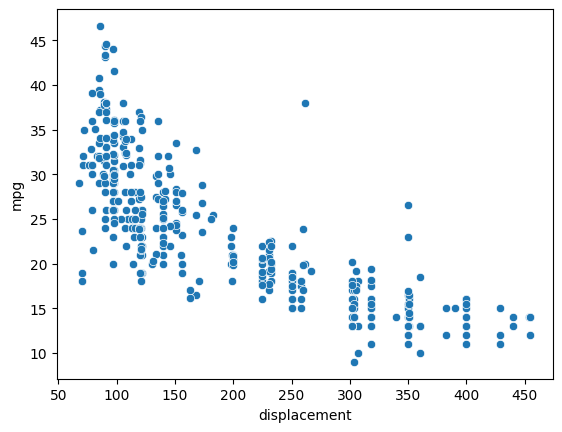

In [6]:
sns.scatterplot(x='displacement', y='mpg', data=Auto)

In [7]:
X = Auto["displacement"].values.reshape(-1, 1)
Y = Auto["mpg"].values

for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, Y)
    Y_pred = model.predict(X_poly)
    mse = mean_squared_error(Y, Y_pred)
    print(f"Degree {degree} MSE: {mse:.4f}")

Degree 1 MSE: 21.3745
Degree 2 MSE: 18.9088
Degree 3 MSE: 18.8580


<Axes: xlabel='horsepower', ylabel='mpg'>

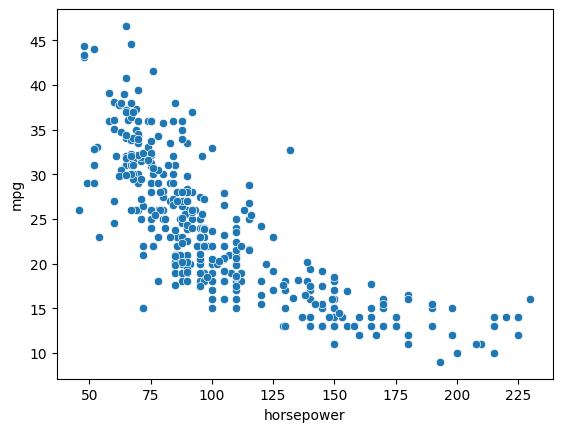

In [8]:
sns.scatterplot(x='horsepower', y='mpg', data=Auto)

In [9]:
X = Auto["horsepower"].values.reshape(-1, 1)
Y = Auto["mpg"].values

for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, Y)
    Y_pred = model.predict(X_poly)
    mse = mean_squared_error(Y, Y_pred)
    print(f"Degree {degree} MSE: {mse:.4f}")

Degree 1 MSE: 23.9437
Degree 2 MSE: 18.9848
Degree 3 MSE: 18.9450


<Axes: xlabel='weight', ylabel='mpg'>

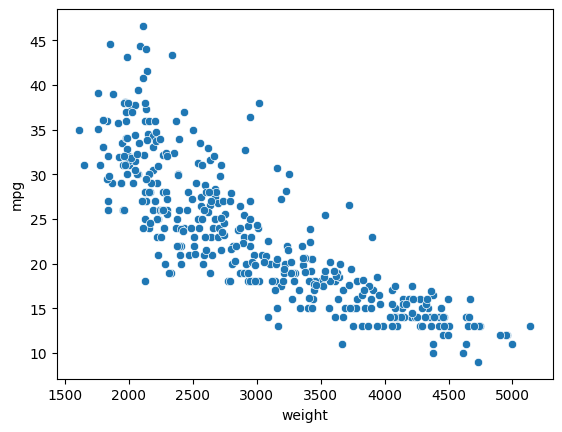

In [10]:
sns.scatterplot(x='weight', y='mpg', data=Auto)

In [11]:
X = Auto["weight"].values.reshape(-1, 1)
Y = Auto["mpg"].values

for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, Y)
    Y_pred = model.predict(X_poly)
    mse = mean_squared_error(Y, Y_pred)
    print(f"Degree {degree} MSE: {mse:.4f}")

Degree 1 MSE: 18.6766
Degree 2 MSE: 17.3084
Degree 3 MSE: 17.3083


<Axes: xlabel='acceleration', ylabel='mpg'>

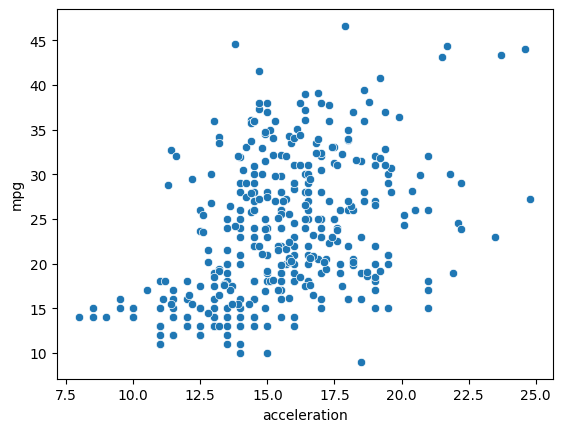

In [12]:
sns.scatterplot(x='acceleration', y='mpg', data=Auto)

In [13]:
X = Auto["acceleration"].values.reshape(-1, 1)
Y = Auto["mpg"].values

for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, Y)
    Y_pred = model.predict(X_poly)
    mse = mean_squared_error(Y, Y_pred)
    print(f"Degree {degree} MSE: {mse:.4f}")

Degree 1 MSE: 49.8736
Degree 2 MSE: 48.9770
Degree 3 MSE: 48.8831


<Axes: xlabel='year', ylabel='mpg'>

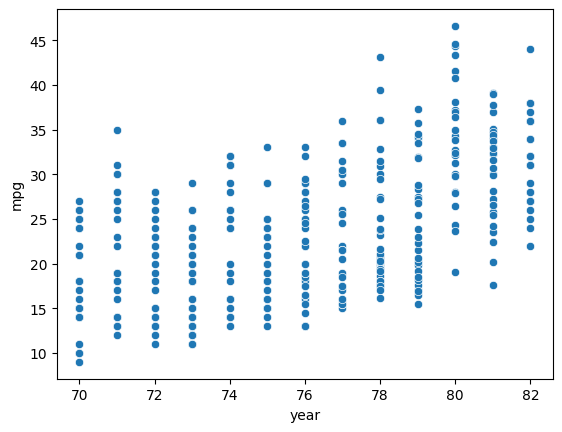

In [14]:
sns.scatterplot(x='year', y='mpg', data=Auto)

In [15]:
X = Auto["year"].values.reshape(-1, 1)
Y = Auto["mpg"].values

for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, Y)
    Y_pred = model.predict(X_poly)
    mse = mean_squared_error(Y, Y_pred)
    print(f"Degree {degree} MSE: {mse:.4f}")

Degree 1 MSE: 40.2840
Degree 2 MSE: 38.4309
Degree 3 MSE: 38.3586


<Axes: xlabel='origin', ylabel='mpg'>

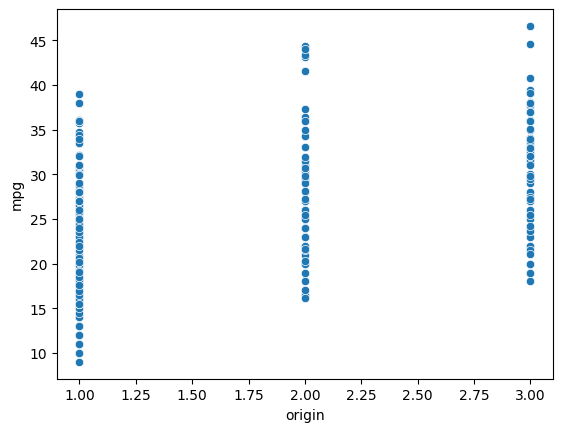

In [16]:
sns.scatterplot(x='origin', y='mpg', data=Auto)

In [17]:
X = Auto["origin"].values.reshape(-1, 1)
Y = Auto["mpg"].values

for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, Y)
    Y_pred = model.predict(X_poly)
    mse = mean_squared_error(Y, Y_pred)
    print(f"Degree {degree} MSE: {mse:.4f}")

Degree 1 MSE: 41.3514
Degree 2 MSE: 40.5987
Degree 3 MSE: 40.5987


In [18]:
y = Auto['mpg'].values.reshape(-1, 1)
accelaration = Auto['acceleration'].values.reshape(-1, 1)

In [19]:
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(accelaration)

In [20]:
M = sm.OLS(y, X_poly).fit()
summarize(M)

,coef,std err,t,P>|t|
x1,-3.3539,2.031,-1.652,0.099
x2,0.8935,0.368,2.425,0.016
x3,-0.0519,0.022,-2.372,0.018
x4,0.0009,0.000,2.238,0.026


In [21]:
accelaration_grid = np.linspace(accelaration.min(), accelaration.max(), 100)
accelaration_df = pd.DataFrame({'accelaration': accelaration_grid})

In [22]:
def plot_accelaration_fit(accelaration_df, basis, title):
    X = basis.transform(accelaration)
    Xnew = basis.transform(accelaration_df)
    M = sm.OLS(y, X).fit()
    preds = M.get_prediction(Xnew)
    bands = preds.conf_int(alpha=0.05)
    fig, ax = subplots(figsize=(8,8))
    ax.scatter(accelaration, y, facecolor='gray', alpha=0.5)
    for val, ls in zip([preds.predicted_mean, bands[:,0], bands[:,1]], ['b','r--','r--']):
        ax.plot(accelaration_df.values, val, ls, linewidth=3)
        ax.set_title(title, fontsize=20)
        ax.set_xlabel('Accelaration', fontsize=20)
        ax.set_ylabel('MPG', fontsize=20);
        return ax

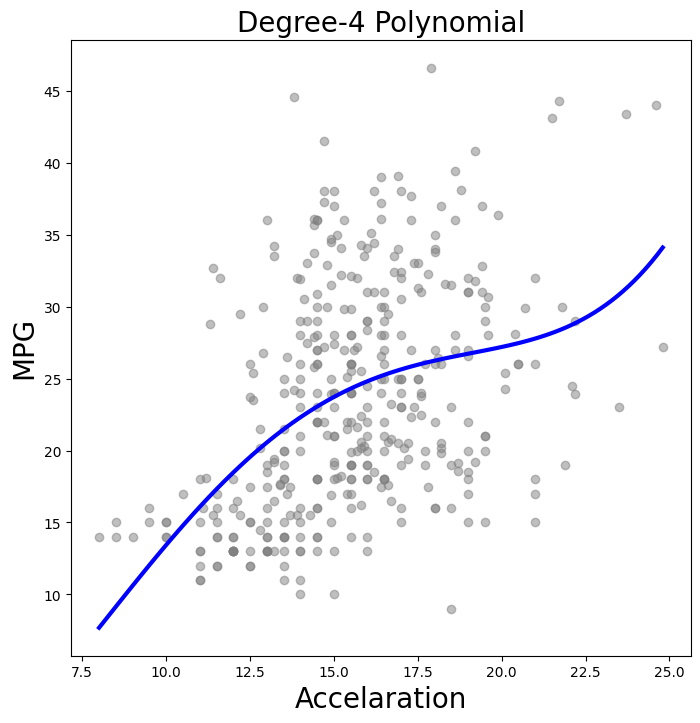

In [23]:
plot_accelaration_fit(accelaration_df, poly, 'Degree-4 Polynomial');

In [24]:
X_accelaration = np.asarray(accelaration).reshape((-1,1))
gam = LinearGAM(s_gam(0, lam=0.6))
gam.fit(X_accelaration, y)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + intercept, tol=0.0001, 
   verbose=False)

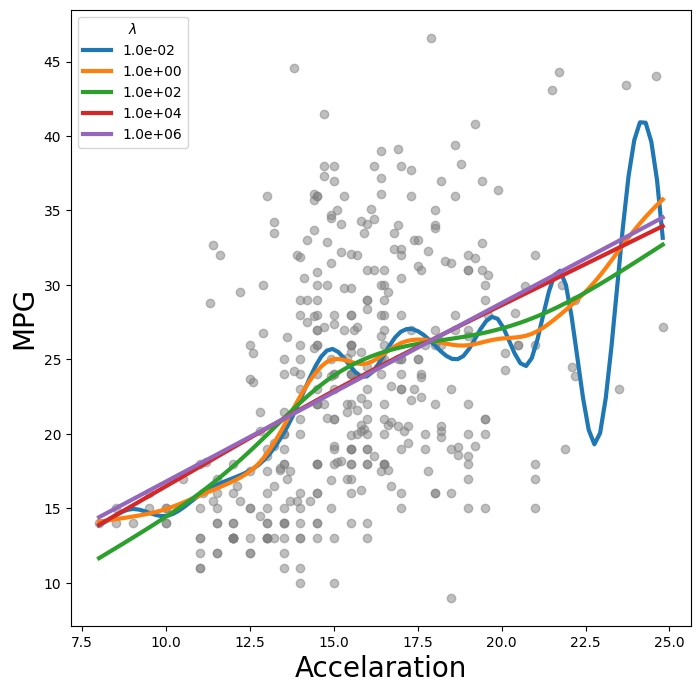

In [25]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(accelaration, y, facecolor='gray', alpha=0.5)
for lam in np.logspace(-2, 6, 5):
    gam = LinearGAM(s_gam(0, lam=lam)).fit(X_accelaration, y)
    ax.plot(accelaration_grid, gam.predict(accelaration_grid), label='{:.1e}'.format(lam), linewidth=3)
    ax.set_xlabel('Accelaration', fontsize=20)
    ax.set_ylabel('MPG', fontsize=20);
    ax.legend(title='$\lambda$');

In [26]:
ns_accelaration = NaturalSpline(df=4).fit(accelaration)
ns_year = NaturalSpline(df=5).fit(Auto['year'])
Xs = [ns_accelaration.transform(accelaration), ns_year.transform(Auto['year']),pd.get_dummies(Auto['cylinders']).values]
X_bh = np.hstack(Xs)
gam_bh = sm.OLS(y, X_bh).fit()

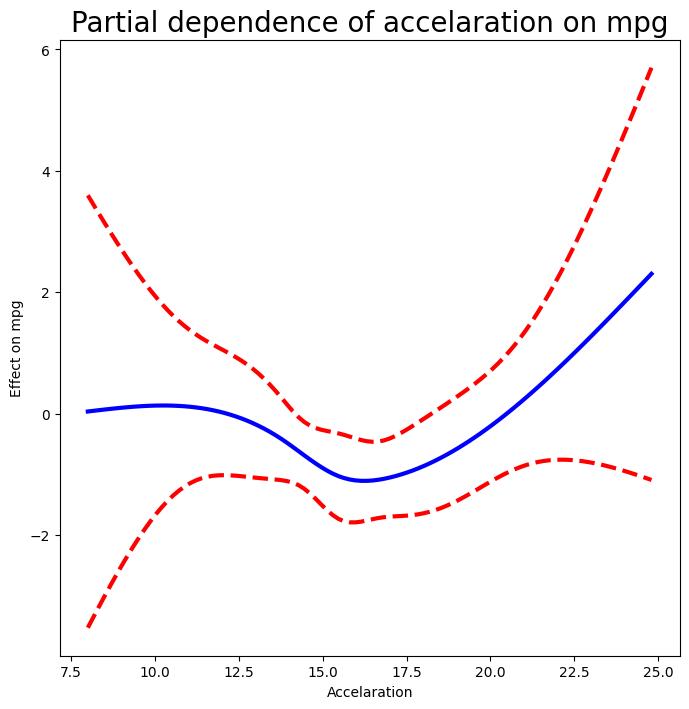

In [27]:
accelaration_grid = np.linspace(accelaration.min(), accelaration.max(), 100)
X_accelaration_bh = X_bh.copy()[:100]
X_accelaration_bh[:] = X_bh[:].mean(0)[None,:]
X_accelaration_bh[:,:4] = ns_accelaration.transform(accelaration_grid)
preds = gam_bh.get_prediction(X_accelaration_bh)
bounds_accelaration = preds.conf_int(alpha=0.05)
partial_accelaration = preds.predicted_mean
center = partial_accelaration.mean()
partial_accelaration-= center
bounds_accelaration-= center
fig, ax = subplots(figsize=(8,8))
ax.plot(accelaration_grid, partial_accelaration, 'b', linewidth=3)
ax.plot(accelaration_grid, bounds_accelaration[:,0], 'r--', linewidth=3)
ax.plot(accelaration_grid, bounds_accelaration[:,1], 'r--', linewidth=3)
ax.set_xlabel('Accelaration')
ax.set_ylabel('Effect on mpg')
ax.set_title('Partial dependence of accelaration on mpg', fontsize=20);